In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
dataset=pd.read_csv('/content/Assignment 2 DataSet.csv'); print(dataset.head(5))

   Product Rating   Delivery Satisfaction  Feedback
0                9                      3         0
1                2                      5        -1
2                3                      6        -1
3               10                      3         0
4                3                      9         0


In [43]:
# The system calculates customer feedback based on Product Satisfaction and Delivery Satisfaction
# scores. The feedback is determined by averaging the two scores:

# 1 (Positive): Average ≥ 8
# 0 (Neutral): 5 ≤ Average < 7
# -1 (Negative): Average < 5
# It trains a neural network on historical feedback data to predict the sentiment (positive, neutral, negative)
# based on these inputs. The model is evaluated on test data to validate its performance.

In [44]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [45]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate):
        # Initialize weights randomly for all layers
        self.W_H1 = np.random.randn(input_size, hidden_size1) * 0.01
        self.W_H2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
        self.W_H3 = np.random.randn(hidden_size2, hidden_size3) * 0.01
        self.W_OH = np.random.randn(hidden_size3, output_size) * 0.01
        self.learning_rate = learning_rate

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedforward(self, X):
        # Perform forward propagation
        self.hidden1_output = self.sigmoid(np.dot(X, self.W_H1))
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.W_H2))
        self.hidden3_output = self.sigmoid(np.dot(self.hidden2_output, self.W_H3))
        output_input = np.dot(self.hidden3_output, self.W_OH)
        output = self.softmax(output_input)
        return output

    def backpropagation(self, X, Y, output):
        # Calculate output error and deltas
        output_error = output - Y  # Gradient of loss w.r.t. softmax output
        output_delta = output_error

        # Propagate errors backward
        hidden3_error = np.dot(output_delta, self.W_OH.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, derivative=True)

        hidden2_error = np.dot(hidden3_delta, self.W_H3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, derivative=True)

        hidden1_error = np.dot(hidden2_delta, self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, derivative=True)

        # Update weights using gradient descent
        self.W_OH -= self.learning_rate * np.dot(self.hidden3_output.T, output_delta)
        self.W_H3 -= self.learning_rate * np.dot(self.hidden2_output.T, hidden3_delta)
        self.W_H2 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_delta)
        self.W_H1 -= self.learning_rate * np.dot(X.T, hidden1_delta)

    def train(self, X, Y, epochs=1000):
        errors = []
        for epoch in range(epochs):
            # Forward and backward propagation
            output = self.feedforward(X)
            self.backpropagation(X, Y, output)
            # Compute and log the mean squared error
            error = np.mean(np.square(Y - output))
            errors.append(error)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Error: {error}")
        return errors

# Data Preprocessing
unique_labels = np.unique(y)  # Unique classes in the dataset
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}

# Convert labels to indices
Y_indices = np.array([label_to_index[label] for label in y])

# Convert to one-hot encoding
Y_one_hot = np.eye(len(unique_labels))[Y_indices]

# Example of initializing and training the neural network
input_size = 10  # Number of input features
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
output_size = len(unique_labels)  # Number of output classes
learning_rate = 0.01

# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate)

# Example dataset: features `X` and labels `Y_one_hot`
X = np.random.randn(100, input_size)  # 100 samples with `input_size` features
errors = nn.train(X, Y_one_hot, epochs=10000)


Epoch 0, Error: 0.22208526392263395
Epoch 1000, Error: 0.21039999614656799
Epoch 2000, Error: 0.21039999081601735
Epoch 3000, Error: 0.2103999851425168
Epoch 4000, Error: 0.21039997884308445
Epoch 5000, Error: 0.21039997157578402
Epoch 6000, Error: 0.21039996290104399
Epoch 7000, Error: 0.2103999522247673
Epoch 8000, Error: 0.21039993870972423
Epoch 9000, Error: 0.2103999211310871


Epoch 0, Error: 0.22200035569684942
Epoch 1000, Error: 0.21337890570233106
Epoch 2000, Error: 0.21337890350620103
Epoch 3000, Error: 0.213378900921417
Epoch 4000, Error: 0.2133788974907006
Test Accuracy: 43.75%


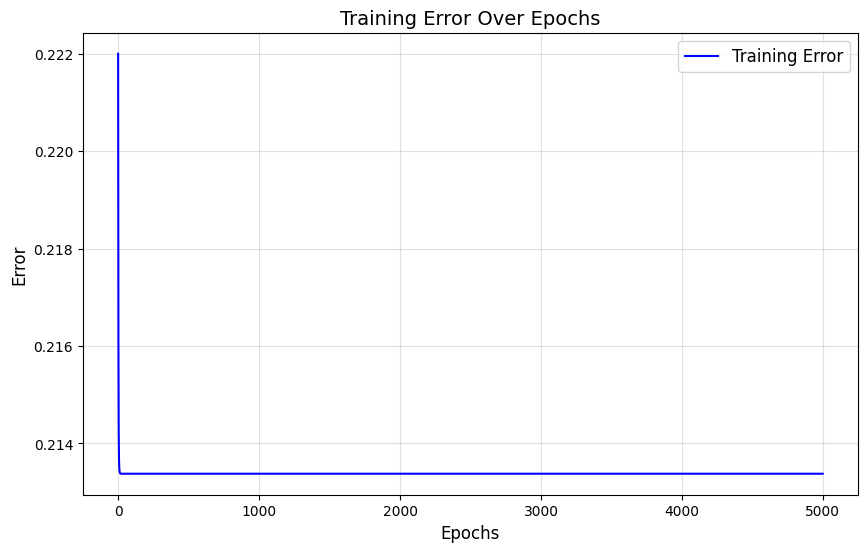

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and Y are correctly prepared with 2 input features and 3 output classes
# Example initialization for X (80 samples, 2 features)
X = np.random.randint(1, 11, (80, 2))  # Random product rating and delivery satisfaction

# One-hot encode Y (80 samples, 3 output classes)
Y_one_hot = np.zeros((80, 3))
for i in range(80):
    avg = np.mean(X[i])
    if avg >= 8:
        Y_one_hot[i] = [1, 0, 0]  # Positive
    elif avg > 5:
        Y_one_hot[i] = [0, 1, 0]  # Neutral
    else:
        Y_one_hot[i] = [0, 0, 1]  # Negative

# Split dataset into training and testing
np.random.seed(42)
indices = np.random.permutation(len(X))  # Shuffle indices
split_index = int(0.8 * len(X))  # 80% train, 20% test

train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Splitting the dataset
X_train, X_test = X[train_indices], X[test_indices]
Y_train, Y_test = Y_one_hot[train_indices], Y_one_hot[test_indices]

# Neural network configuration
input_size = 2  # Input features (Product and Delivery Satisfaction)
hidden_size1 = 5  # Hidden layer 1 size
hidden_size2 = 5  # Hidden layer 2 size
hidden_size3 = 5  # Hidden layer 3 size
output_size = 3  # Output classes (Negative, Neutral, Positive)
learning_rate = 0.01  # Learning rate for weight updates

# Initialize neural network
NN = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate)

# Train the neural network
epochs = 5000  # Number of training iterations
errors = NN.train(X_train, Y_train, epochs)

# Test predictions
Y_pred = NN.feedforward(X_test)  # Forward pass on test data
predictions = np.argmax(Y_pred, axis=1)  # Predicted labels
true_labels = np.argmax(Y_test, axis=1)  # True labels

# Calculate accuracy
accuracy = np.mean(predictions == true_labels) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot training error over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label='Training Error', color='blue')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Training Error Over Epochs', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.4)
plt.show()
